In [ ]:
import pandas as pd

# Increase the display limit
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns (if needed)
pd.set_option('display.width', 1000)  # Adjust output width
pd.set_option('display.max_colwidth', None)  # Prevent text truncation in columns

df = pd.read_csv("data/region_08.csv")
# print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data/region_09.csv'

In [ ]:
def count_duplicate_rows(df):
    return df.duplicated().sum()

num_duplicates = count_duplicate_rows(df)
num_duplicates

np.int64(110)

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
def remove_high_missing_cols(df, threshold=90):
    missing_percentage = (df.isnull().sum() / len(df)) * 100  # Calculate % of missing values
    cols_to_keep = missing_percentage[missing_percentage <= threshold].index  # Keep cols with <= threshold% missing
    df_filtered = df[cols_to_keep]  # Filter DataFrame
    return df_filtered

# Usage:
df_cleaned = remove_high_missing_cols(df)
print(f"Columns removed: {set(df.columns) - set(df_cleaned.columns)}")

Columns removed: {'ransomamt', 'natlty2', 'gsubname3', 'target2', 'targtype2', 'attacktype2', 'gsubname2', 'weaptype3', 'claimmode3_txt', 'ransomnote', 'gname2', 'natlty2_txt', 'corp3', 'claimmode', 'guncertain2', 'nhostkidus', 'ndays', 'weapsubtype3', 'hostkidoutcome_txt', 'weapsubtype4_txt', 'targsubtype2_txt', 'weapsubtype4', 'weapsubtype3_txt', 'targsubtype3_txt', 'targtype3_txt', 'guncertain3', 'ransomamtus', 'nhours', 'targsubtype2', 'weaptype2', 'claimmode2_txt', 'targtype2_txt', 'claim2', 'hostkidoutcome', 'attacktype3_txt', 'weapsubtype2_txt', 'targsubtype3', 'attacktype2_txt', 'weapsubtype2', 'weaptype3_txt', 'nhostkid', 'target3', 'natlty3_txt', 'approxdate', 'attacktype3', 'weaptype4_txt', 'corp2', 'kidhijcountry', 'ransompaidus', 'compclaim', 'weaptype2_txt', 'weaptype4', 'nreleased', 'gname3', 'gsubname', 'claimmode2', 'claimmode3', 'targtype3', 'claimmode_txt', 'divert', 'ransompaid', 'resolution', 'claim3', 'natlty3'}


In [ ]:
df_filtered = remove_high_missing_cols(df,90)

In [ ]:
df_filtered.dropna(subset=['latitude', 'longitude'])
df_filtered.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,motive,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,ransom,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,1,10,0,499,East Germany (GDR),9,Eastern Europe,Berlin,Berlin,52.50153,13.401851,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,2,Government (General),NaN,NaN,NaN,Jurists Ball (Palais au Frankturm),75.0,Germany,Commune 1,NaN,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,"Damages: none, attempted to detonate device and were unsuccessful (Jurists Ball)",0,0.0,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
1,1.970000e+11,1970,1,28,0,499,East Germany (GDR),9,Eastern Europe,Berlin,Berlin,52.50153,13.401851,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,3,Police,25.0,Police Security Forces/Officers,NaN,Residence of President of Penal Office,75.0,Germany,Unknown,NaN,0.0,0,NaN,NaN,NaN,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,Molotov cocktail,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2,1.970000e+11,1970,4,28,0,499,East Germany (GDR),9,Eastern Europe,Berlin,Berlin,52.50153,13.401851,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,2,Government (General),14.0,Judge/Attorney/Court,NaN,Court Bldg,75.0,Germany,Unknown,NaN,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,5,5,0,499,East Germany (GDR),9,Eastern Europe,Berlin,Berlin,52.50153,13.401851,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,American-Haus,217.0,United States,Extraparliamentary Opposition (APO),NaN,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
4,1.970000e+11,1970,5,10,0,499,East Germany (GDR),9,Eastern Europe,Berlin,Berlin,52.50153,13.401851,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,1,Business,4.0,Multinational Corporation,NaN,IBM Office,217.0,United States,Extraparliamentary Opposition (APO),NaN,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN


In [ ]:
def missing_val_index(df_filtered):
    missing_values = (df_filtered.isnull().sum() / len(df_filtered)) * 100
    #Checking the values of cols which have more than 50% null
    high_missing_cols = missing_values[missing_values > 50].index
    df_more_than_50_null = df_filtered[high_missing_cols].columns
    #Checking the values of cols which have less than 50% null
    less_missing_cols = missing_values[(missing_values < 50) & (missing_values > 0)].index
    df_less_than_50_null = df_filtered[less_missing_cols].columns

    none_missing_cols = missing_values[missing_values == 0].index
    df_none_null = df_filtered[none_missing_cols].columns
    return df_more_than_50_null,df_less_than_50_null,df_none_null

In [ ]:
num_cols = set(df_filtered.select_dtypes(include=['number']).columns)
obj_cols = set(df_filtered.select_dtypes(include=['object']).columns)

# Step 2: Find matching column pairs where text columns end with '_txt'
to_remove = set()

for col in num_cols:
    txt_version = col + "_txt"  # Check if text counterpart exists
    if txt_version in obj_cols:
        to_remove.add(col)  # Mark the numerical column for removal

# Step 3: Drop the identified numerical columns
df_cleaned = df_filtered.drop(columns=to_remove)

# Display results
print("Numerical columns removed:", to_remove)
print("\nCleaned DataFrame Columns:\n", df_cleaned.columns)

Numerical columns removed: {'region', 'country', 'targsubtype1', 'weapsubtype1', 'alternative', 'attacktype1', 'natlty1', 'propextent', 'targtype1', 'weaptype1'}

Cleaned DataFrame Columns:
 Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'], dtype='object')


In [ ]:
import plotly.express as px
from ipywidgets import interact
def plot_distribution(column_name):
    # Count occurrences including NaN values
    
    value_counts = df_cleaned[column_name].value_counts(dropna=False).reset_index()
    value_counts.columns = [column_name, 'count']

    # Convert NaN values to a string for visualization
    value_counts[column_name] = value_counts[column_name].astype(str)

    # Create bar chart
    fig = px.bar(value_counts, x=column_name, y='count', 
                 title=f"Distribution of Values in '{column_name}' Column",
                 labels={column_name: column_name, 'count': 'Count'})

    # Show the figure
    fig.show()

In [ ]:
# Interactive dropdown for less than 50% null
df_more_than_50_null,df_less_than_50_null,df_none_null = missing_val_index(df_cleaned)
interact(plot_distribution, column_name=df_less_than_50_null)

interactive(children=(Dropdown(description='column_name', options=('city', 'latitude', 'longitude', 'summary',…

<function __main__.plot_distribution(column_name)>

In [ ]:
# Interactive dropdown for more than 50% null
interact(plot_distribution, column_name=df_more_than_50_null)

interactive(children=(Dropdown(description='column_name', options=('location', 'alternative_txt', 'motive', 'p…

<function __main__.plot_distribution(column_name)>

In [ ]:
# Interactive dropdown for more than 50% null
interact(plot_distribution, column_name=df_none_null)

interactive(children=(Dropdown(description='column_name', options=('eventid', 'iyear', 'imonth', 'iday', 'exte…

<function __main__.plot_distribution(column_name)>

In [ ]:
## segregating numerical and categorical cols
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_numerical = df_cleaned[numerical_cols]
df_categorical = df_cleaned[categorical_cols]


In [ ]:
df_more_than_50_null_cat,df_less_than_50_null_cat,df_none_null_cat = missing_val_index(df_categorical)
df_more_than_50_null_num,df_less_than_50_null_num,df_none_null_num = missing_val_index(df_numerical)
print("------- Categorical cols with less than 50% null vals--------")

df_categorical.loc[:, df_less_than_50_null_cat].info()


------- Categorical cols with less than 50% null vals--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              5211 non-null   object
 1   summary           4365 non-null   object
 2   targsubtype1_txt  4995 non-null   object
 3   corp1             4428 non-null   object
 4   target1           5200 non-null   object
 5   natlty1_txt       5182 non-null   object
 6   weapsubtype1_txt  4863 non-null   object
 7   weapdetail        3164 non-null   object
 8   scite1            4361 non-null   object
 9   scite2            2844 non-null   object
dtypes: object(10)
memory usage: 407.6+ KB


In [ ]:
df_categorical.loc[:, df_less_than_50_null_cat] = df_categorical.loc[:, df_less_than_50_null_cat].fillna("Unknown")

/var/folders/t5/f7h8xdc15fv4wlpvsmrs4j2r0000gn/T/ipykernel_20920/984255441.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("------- Numerical cols with less than 50% null vals--------")
df_numerical.loc[:, df_less_than_50_null_num].info()

------- Numerical cols with less than 50% null vals--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     5192 non-null   float64
 1   longitude    5192 non-null   float64
 2   guncertain1  5209 non-null   float64
 3   nperps       3519 non-null   float64
 4   nperpcap     4110 non-null   float64
 5   claimed      4365 non-null   float64
 6   nkill        5062 non-null   float64
 7   nkillus      4362 non-null   float64
 8   nkillter     4262 non-null   float64
 9   nwound       4973 non-null   float64
 10  nwoundus     4361 non-null   float64
 11  nwoundte     4202 non-null   float64
dtypes: float64(12)
memory usage: 489.1 KB


In [ ]:
df_numerical.loc[:, df_less_than_50_null_num] = df_numerical.loc[:, df_less_than_50_null_num].fillna(0)

In [ ]:
print("------- Categorical cols with NO null vals--------")
df_categorical.loc[:, df_none_null_cat].info()

------- Categorical cols with NO null vals--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country_txt      5216 non-null   object
 1   region_txt       5216 non-null   object
 2   provstate        5216 non-null   object
 3   attacktype1_txt  5216 non-null   object
 4   targtype1_txt    5216 non-null   object
 5   gname            5216 non-null   object
 6   weaptype1_txt    5216 non-null   object
 7   dbsource         5216 non-null   object
dtypes: object(8)
memory usage: 326.1+ KB


In [ ]:
print("------- Numerical cols with NO null vals--------")
df_numerical.loc[:, df_none_null_num].info()

------- Numerical cols with NO null vals--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eventid      5216 non-null   float64
 1   iyear        5216 non-null   int64  
 2   imonth       5216 non-null   int64  
 3   iday         5216 non-null   int64  
 4   extended     5216 non-null   int64  
 5   specificity  5216 non-null   int64  
 6   vicinity     5216 non-null   int64  
 7   crit1        5216 non-null   int64  
 8   crit2        5216 non-null   int64  
 9   crit3        5216 non-null   int64  
 10  doubtterr    5216 non-null   int64  
 11  multiple     5216 non-null   int64  
 12  success      5216 non-null   int64  
 13  suicide      5216 non-null   int64  
 14  individual   5216 non-null   int64  
 15  property     5216 non-null   int64  
 16  ishostkid    5216 non-null   int64  
 17  INT_LOG      5216 non-null   int64  
 18 

In [ ]:
print("------- Categorical cols with more than 50% null vals--------")
df_categorical.loc[:, df_more_than_50_null_cat].info()

------- Categorical cols with more than 50% null vals--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location         1577 non-null   object
 1   alternative_txt  1329 non-null   object
 2   motive           2276 non-null   object
 3   propextent_txt   1993 non-null   object
 4   propcomment      2403 non-null   object
 5   addnotes         949 non-null    object
 6   scite3           1460 non-null   object
 7   related          597 non-null    object
dtypes: object(8)
memory usage: 326.1+ KB


In [ ]:
print("------- Categorical cols with more than 50% null vals--------")
df_numerical.loc[:, df_more_than_50_null_num].info()

------- Categorical cols with more than 50% null vals--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   propvalue  949 non-null    float64
 1   ransom     1083 non-null   float64
dtypes: float64(2)
memory usage: 81.6 KB


In [ ]:
def plot_distribution_clean(column_name):
    # Count occurrences including NaN values
    
    value_counts = df_categorical[column_name].value_counts(dropna=False).reset_index()
    value_counts.columns = [column_name, 'count']

    # Convert NaN values to a string for visualization
    value_counts[column_name] = value_counts[column_name].astype(str)

    # Create bar chart
    fig = px.bar(value_counts, x=column_name, y='count', 
                 title=f"Distribution of Values in '{column_name}' Column",
                 labels={column_name: column_name, 'count': 'Count'})

    # Show the figure
    fig.show()
interact(plot_distribution_clean, column_name=df_less_than_50_null_cat)

interactive(children=(Dropdown(description='column_name', options=('city', 'summary', 'targsubtype1_txt', 'cor…

<function __main__.plot_distribution_clean(column_name)>

In [ ]:
interact(plot_distribution_clean, column_name=df_none_null_cat)

interactive(children=(Dropdown(description='column_name', options=('country_txt', 'region_txt', 'provstate', '…

<function __main__.plot_distribution_clean(column_name)>

In [ ]:
def plot_box(column_name):
    fig = px.box(df_numerical, y=column_name, 
                 title=f"Box Plot of '{column_name}'",
                 labels={column_name: column_name},
                 boxmode="overlay")  # Overlay multiple box plots if needed
    fig.show()

# Interactive dropdown to select numerical column


In [ ]:
interact(plot_box, column_name=df_none_null_num)

interactive(children=(Dropdown(description='column_name', options=('eventid', 'iyear', 'imonth', 'iday', 'exte…

<function __main__.plot_box(column_name)>

In [ ]:
interact(plot_box, column_name=df_less_than_50_null_num)

interactive(children=(Dropdown(description='column_name', options=('latitude', 'longitude', 'guncertain1', 'np…

<function __main__.plot_box(column_name)>

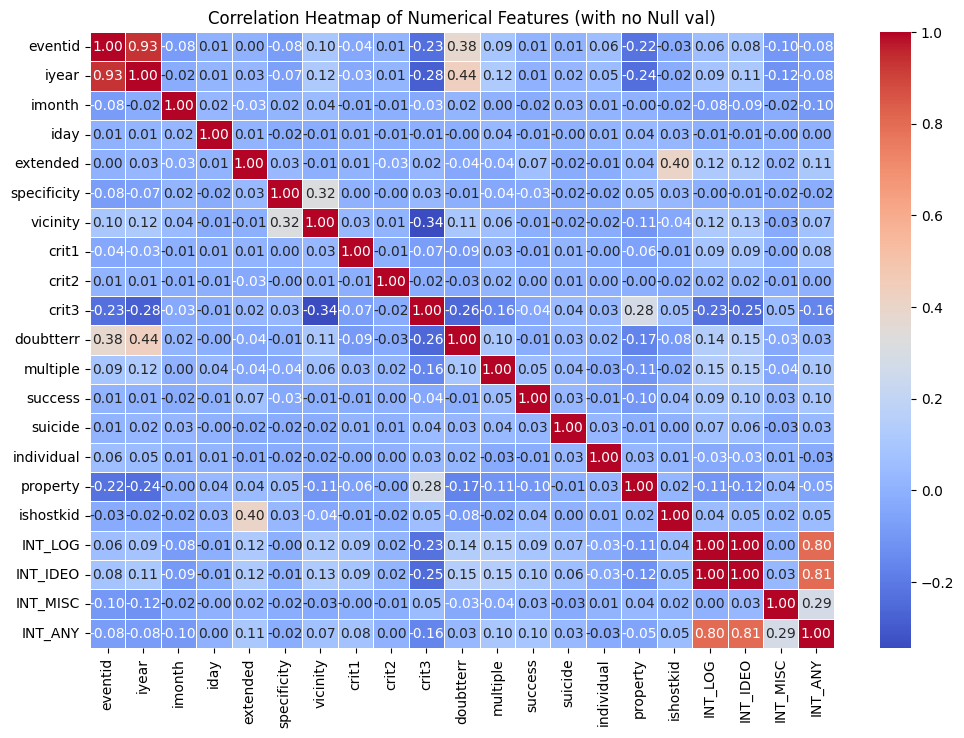

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_numerical.loc[:, df_none_null_num].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features (with no Null val)")
plt.show()

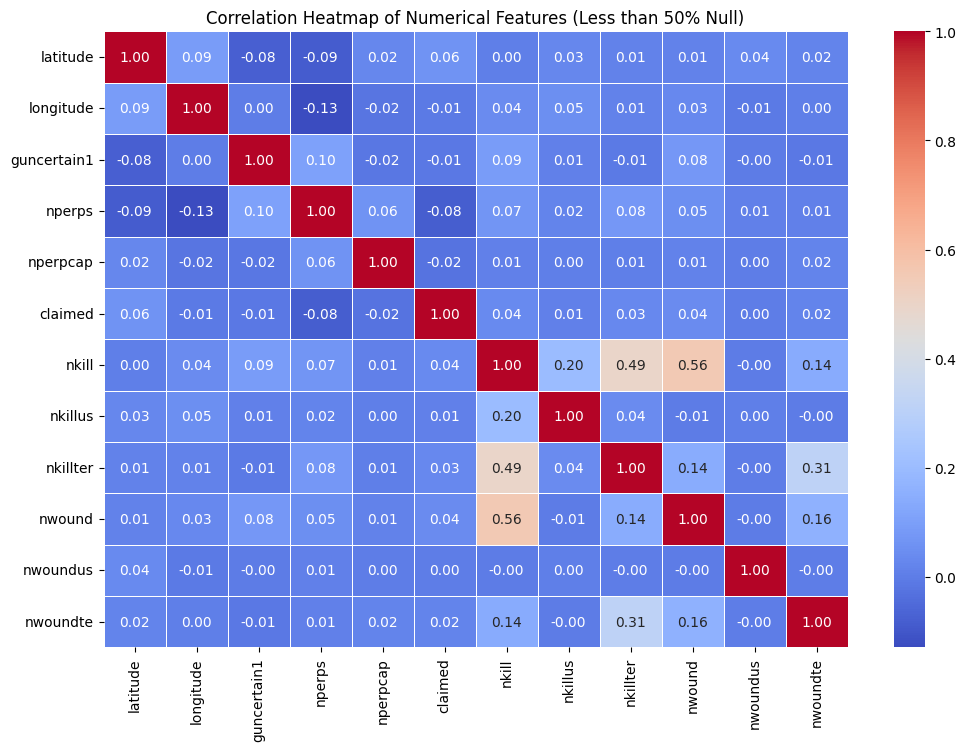

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_numerical.loc[:, df_less_than_50_null_num].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features (Less than 50% Null)")
plt.show()

In [ ]:

# Create scatter geo plot with country borders
fig = px.scatter_geo(df_numerical, 
                     lat='latitude', 
                     lon='longitude',
                     title="Geospatial Distribution of Places Affected by Attack",
                     projection="natural earth",  # Use a map projection with borders
                     hover_name=df_categorical['country_txt'],  
                     opacity=0.7)

# Add country borders
fig.update_geos(
    showcountries=True,  # Show country borders
    countrycolor="black",  # Border color
    # showcountriesborder=True,  # Enable country border visibility
    showcoastlines=True,  # Show coastlines
    coastlinecolor="gray"  # Coastline color
)

# Show the map
fig.show()